# Portfolio Simulation Modeling

## Download Data
#### Download S&P 500 index data from Yahoo Finance

In [78]:
import pandas as pd
import pandas.io.data as web
import matplotlib.pyplot as plt
import datetime as datetime
from numpy import *
%matplotlib inline

Set start date, end date and data source ('Yahoo Finance', 'Google Finance', etc.). Download S&P 500 index data from Yahoo Finance.

In [79]:
start_date = datetime.date(1976,1,1)
end_date = datetime.date(2017,1,1)
# Download S&P 500 index data
try:
    SnP500_Ddata = web.DataReader('^GSPC','yahoo',start_date,end_date)
except:
    SnP500_Ddata = pd.read_csv("http://analytics.romanko.ca/data/SP500_hist.csv")
    SnP500_Ddata.index = pd.to_datetime(SnP500_Ddata.Date)
SnP500_Ddata.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
1976-01-02,1976-01-02,90.190002,91.180000,89.809998,90.900002,90.900002,10300000
1976-01-05,1976-01-05,90.900002,92.839996,90.849998,92.580002,92.580002,21960000
1976-01-06,1976-01-06,92.580002,94.180000,92.370003,93.529999,93.529999,31270000
1976-01-07,1976-01-07,93.529999,95.150002,92.910004,93.949997,93.949997,33170000
1976-01-08,1976-01-08,93.949997,95.470001,93.410004,94.580002,94.580002,29030000


#### Transform daily data into annual data:

In [80]:
# Create a time-series of annual data points from daily data
SnP500_Adata = SnP500_Ddata.resample('A').last()
SnP500_Adata[['Volume','Adj Close']].tail()

,Volume,Adj Close
Date,,
2012-12-31,3204330000,1426.189941
2013-12-31,2312840000,1848.359985
2014-12-31,2606070000,2058.899902
2015-12-31,2655330000,2043.939941
2016-12-31,2670900000,2238.830078


#### Compute annual return of S&P 500 index:

In [81]:
SnP500_Adata[['Adj Close']] = SnP500_Adata[['Adj Close']].apply(pd.to_numeric, errors='ignore')
SnP500_Adata['returns'] = SnP500_Adata['Adj Close'] / SnP500_Adata['Adj Close'].shift(1) -1
SnP500_Adata = SnP500_Adata.dropna()
print SnP500_Adata['returns']

Date
1977-12-31   -0.115020
1978-12-31    0.010620
1979-12-31    0.123088
1980-12-31    0.257736
1981-12-31   -0.097304
1982-12-31    0.147613
1983-12-31    0.172710
1984-12-31    0.014006
1985-12-31    0.263334
1986-12-31    0.146204
1987-12-31    0.020275
1988-12-31    0.124008
1989-12-31    0.272505
1990-12-31   -0.065591
1991-12-31    0.263067
1992-12-31    0.044643
1993-12-31    0.070552
1994-12-31   -0.015393
1995-12-31    0.341107
1996-12-31    0.202637
1997-12-31    0.310082
1998-12-31    0.266686
1999-12-31    0.195260
2000-12-31   -0.101392
2001-12-31   -0.130427
2002-12-31   -0.233660
2003-12-31    0.263804
2004-12-31    0.089935
2005-12-31    0.030010
2006-12-31    0.136194
2007-12-31    0.035296
2008-12-31   -0.384858
2009-12-31    0.234542
2010-12-31    0.127827
2011-12-31   -0.000032
2012-12-31    0.134057
2013-12-31    0.296012
2014-12-31    0.113906
2015-12-31   -0.007266
2016-12-31    0.095350
Freq: A-DEC, Name: returns, dtype: float64


#### Compute average annual return and standard deviation of return for S&P 500 index:

In [82]:
SnP500_mean_ret = float(SnP500_Adata[['returns']].mean())
SnP500_std_ret = float(SnP500_Adata[['returns']].std())
print ("S&P 500 average return = %g%%, st. dev  = %g%%") % (100*SnP500_mean_ret, 100*SnP500_std_ret)

S&P 500 average return = 9.13031%, st. dev  = 15.8073%


## Simulation Example 1

We want to invest \$1000 in the US stock market for 1 year: $v_0 = 1000$

In [83]:
v0 = 1000 # Initial capital

In our example we assume that the return of the market over the next year follow Normal distribution.

Between 1977 and 2014, S&P 500 returned 9.38% per year on average with a standard deviation of 16.15%.

Generate 100 scenarios for the market return over the next year (draw 100 random numbers from a Normal distribution with mean 9.38% and standard deviation of 16.15%):

In [84]:
Ns = 100 # Number of scenarios
r01 = random.normal(SnP500_mean_ret, SnP500_std_ret, Ns)
r01

array([-0.01238517,  0.26551319,  0.12050935, -0.14274842, -0.04177976,
        0.39895354, -0.03824214, -0.22761098,  0.11755653,  0.08573296,
        0.19937247, -0.00171866,  0.04072682, -0.01189156,  0.3362564 ,
       -0.21669386, -0.38799112,  0.18485995,  0.04754443,  0.11693826,
        0.07614133, -0.1062223 , -0.07852525,  0.14853333,  0.33711094,
        0.10422203,  0.14578936, -0.14485968, -0.00211176,  0.39213514,
        0.12256484, -0.08522198,  0.16713441,  0.18741692, -0.00061099,
        0.15956528, -0.11670832, -0.02210576,  0.11262091,  0.00328012,
        0.06576472,  0.13523109,  0.29724132, -0.12922588, -0.01354248,
        0.17589712, -0.04148897, -0.23096135,  0.16538584, -0.3160094 ,
        0.33628253, -0.10127971,  0.08717314, -0.20843334,  0.24726468,
        0.01839252,  0.13707443, -0.08166534,  0.13717431,  0.34053443,
       -0.06250905, -0.08706011,  0.19035904,  0.25749463,  0.07955175,
        0.19434696,  0.06719778, -0.00841847,  0.15456418, -0.12

Value of investment at the end of year 1:
$v_1 = v_0 + r_{0,1}\cdot v_0 = (1 + r_{0,1})\cdot v_0$

In [85]:
# Distribution of value at the end of year 1
v1 = (r01 + 1) * v0
v1

array([  987.61482528,  1265.51318878,  1120.50934834,   857.25157777,
         958.22024362,  1398.95353975,   961.75785649,   772.38901654,
        1117.55653085,  1085.73295589,  1199.37246505,   998.28134396,
        1040.72682365,   988.10844466,  1336.25639969,   783.30614099,
         612.00887912,  1184.85995012,  1047.54443287,  1116.93826371,
        1076.14132752,   893.77770311,   921.47475209,  1148.53333485,
        1337.11093821,  1104.22202826,  1145.78936276,   855.14032225,
         997.88824334,  1392.13513616,  1122.56484447,   914.77802253,
        1167.13441442,  1187.41691736,   999.38901008,  1159.56528341,
         883.29167977,   977.89424069,  1112.62090557,  1003.28011909,
        1065.76472251,  1135.23108898,  1297.24132031,   870.77412167,
         986.45751643,  1175.89711637,   958.5110295 ,   769.03865222,
        1165.38583865,   683.99060244,  1336.28253363,   898.72028598,
        1087.17313836,   791.56666208,  1247.26468432,  1018.39251755,
      

Mean:

In [86]:
mean(v1)

1067.9374174412631

Standard deviation: 

In [87]:
std(v1)

163.56702482311968

Minimum, maximum: 

In [88]:
min(v1), max(v1)

(612.00887912029145, 1398.9535397528282)

Persentiles

5th percentile, median, 95th percentile:

In [89]:
percentile(v1, [5, 50,95])

array([  791.15363603,  1080.16228588,  1337.24575442])

Alternative way to compute percentiles

5th percentile, median, 95th percentile:

In [90]:
sortedScen = sorted(v1)   # Sort scenarios
sortedScen[5-1], sortedScen[50-1], sortedScen[95-1]

(783.30614098874196, 1079.5517462159646, 1337.1109382129714)

Plot a histogram of the distribution of outcomes for v1:

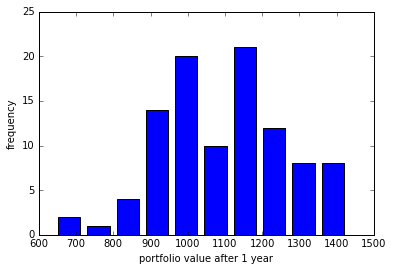

In [91]:
hist, bins = histogram(v1)
positions = (bins[:-1] + bins[1:]) / 2
plt.bar(positions, hist, width=60)
plt.xlabel('portfolio value after 1 year')
plt.ylabel('frequency')
plt.show()

Simulated paths over time:

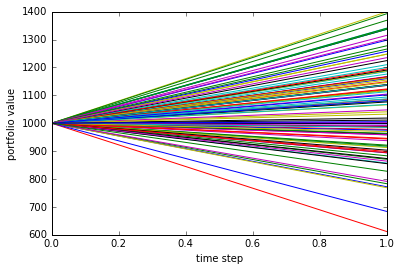

In [92]:
# Plot simulated paths over time
for res in v1:
    plt.plot((0,1), (v0, res))
plt.xlabel('time step')
plt.ylabel('portfolio value')
plt.show()

# Simulation Example 2

You are planning for retirement and decide to invest in the market for the next 30 years (instead of only the next year as in example 1).

Assume that every year your investment returns from investing into the        S&P 500 will follow a Normal distribution with the mean and standard deviation as in example 1.

Your initial capital is still \$1000

In [93]:
v0 = 1000 # Initial capital

Between 1977 and 2014, S&P 500 returned 9.38% per year on average with a standard deviation of 16.15%
Simulate 30 columns of 100 observations each of single period returns:

In [94]:
r_speriod30  = random.normal(SnP500_mean_ret, SnP500_std_ret, (Ns, 30))
r_speriod30

array([[-0.27285485, -0.006935  , -0.0101025 , ...,  0.03304577,
         0.187185  ,  0.22997199],
       [ 0.13763737,  0.01706496,  0.38933684, ...,  0.40079969,
         0.08947382,  0.02410985],
       [ 0.06776747,  0.26355395,  0.21173347, ...,  0.03464522,
         0.06159513,  0.04127322],
       ..., 
       [ 0.47489008, -0.18459152,  0.14817538, ...,  0.14354497,
         0.07564415,  0.24085406],
       [-0.02221353,  0.3444806 ,  0.07884434, ...,  0.25827233,
        -0.06371246,  0.09849279],
       [-0.04462351,  0.05422174,  0.23578598, ...,  0.33485102,
         0.1285475 ,  0.1702835 ]])

Compute and plot $v_{30}$


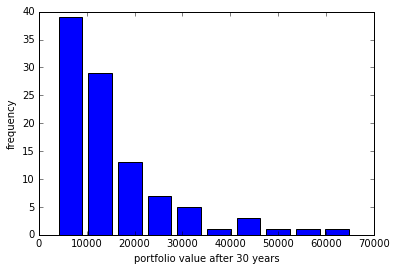

In [95]:
v30 = prod(1 + r_speriod30 , 1) * v0

hist, bins = histogram(v30)
positions = (bins[:-1] + bins[1:]) / 2
width = (bins[1] - bins[0]) * 0.8
plt.bar(positions, hist, width=width)
plt.xlabel('portfolio value after 30 years')
plt.ylabel('frequency')
plt.show()

Simulated paths over time:

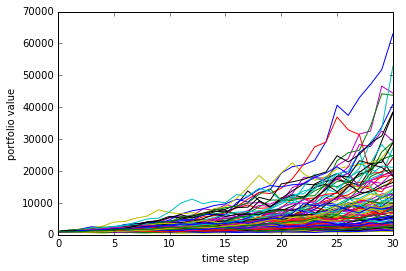

In [96]:
for scenario in r_speriod30:
    y = [prod(1 + scenario[0:i]) * v0 for i in range(0,31)]
    plt.plot(range(0,31), y)
plt.xlabel('time step')
plt.ylabel('portfolio value')
plt.show()

## Simulation Example 3
#### Download US Treasury bill data from Federal Reserve:

In [97]:
# Download 3-month T-bill rates from Federal Reserve
start_date_b = datetime.date(1977,1,1)
end_date_b = datetime.date(2017,1,1)
TBill_Ddata = web.DataReader('DTB3','fred',start_date_b,end_date_b)
TBill_Ddata.head()

,DTB3
DATE,
1977-01-03,4.39
1977-01-04,4.49
1977-01-05,4.47
1977-01-06,4.50
1977-01-07,4.62


#### Transform daily data into annual data:

In [98]:
# Create a time-series of annual data points from daily data
TBill_Adata = TBill_Ddata.resample('A').last()
TBill_Adata[['DTB3']].tail()

,DTB3
DATE,
2012-12-31,0.05
2013-12-31,0.07
2014-12-31,0.04
2015-12-31,0.16
2016-12-31,0.50


#### Compute annual return for bonds:

In [99]:
TBill_Adata['returns'] = TBill_Adata['DTB3'] / 100
TBill_Adata = TBill_Adata.dropna()
print TBill_Adata['returns']

DATE
1977-12-31    0.0613
1978-12-31    0.0926
1979-12-31    0.1204
1980-12-31    0.1430
1981-12-31    0.1108
1982-12-31    0.0792
1983-12-31    0.0897
1984-12-31    0.0785
1985-12-31    0.0705
1986-12-31    0.0567
1987-12-31    0.0568
1988-12-31    0.0810
1989-12-31    0.0755
1990-12-31    0.0644
1991-12-31    0.0388
1992-12-31    0.0308
1993-12-31    0.0301
1994-12-31    0.0553
1995-12-31    0.0496
1996-12-31    0.0507
1997-12-31    0.0522
1998-12-31    0.0437
1999-12-31    0.0517
2000-12-31    0.0573
2001-12-31    0.0171
2002-12-31    0.0120
2003-12-31    0.0093
2004-12-31    0.0218
2005-12-31    0.0399
2006-12-31    0.0489
2007-12-31    0.0329
2008-12-31    0.0011
2009-12-31    0.0006
2010-12-31    0.0012
2011-12-31    0.0002
2012-12-31    0.0005
2013-12-31    0.0007
2014-12-31    0.0004
2015-12-31    0.0016
2016-12-31    0.0050
Freq: A-DEC, Name: returns, dtype: float64


#### Compute average annual return and standard deviation of return for bonds:

In [100]:
TBill_mean_ret = float(TBill_Adata[['returns']].mean())
TBill_std_ret = float(TBill_Adata[['returns']].std())
print ("T-bill average return = %g%%, st. dev  = %g%%") % (100*TBill_mean_ret, 100*TBill_std_ret)

T-bill average return = 4.5845%, st. dev  = 3.64866%


#### Compute covariance matrix:

In [101]:
covMat = cov(array(SnP500_Adata[['returns']]),array(TBill_Adata[['returns']]),rowvar=0)
covMat

array([[ 0.024987  ,  0.00080272],
       [ 0.00080272,  0.00133127]])

#### Simulate portfolio:

In [102]:
v0 = 1000 # Initial capital
Ns = 5000 # Number of scenarios

In [103]:
mu = [SnP500_mean_ret, TBill_mean_ret] # Expected return
mu

[0.09130311413356892, 0.045845000000000004]

In [104]:
stockRet = ones(Ns)
bondsRet = ones(Ns)

In [105]:
scenarios = random.multivariate_normal(mu, covMat, Ns)
for year in range(1, 31):
    scenarios = random.multivariate_normal(mu, covMat, Ns)
    stockRet *= (1 + scenarios[:,0])
    bondsRet *= (1 + scenarios[:,1])

In [106]:
v30 = 0.5 * v0 * stockRet + 0.5 * v0 * bondsRet

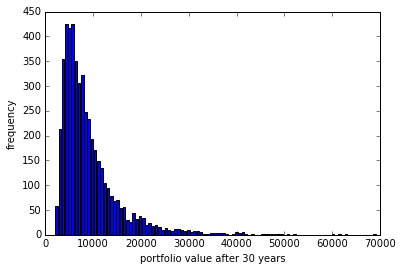

In [107]:
hist, bins = histogram(v30, bins = 100)
positions = (bins[:-1] + bins[1:]) / 2
width = (bins[1] - bins[0]) * 0.8
plt.bar(positions, hist, width=width)
plt.xlabel('portfolio value after 30 years')
plt.ylabel('frequency')
plt.show()

# Simulation Example 4

Compare two portfolios

In [108]:
# Compute portfolios by iterating through different combinations of weights
v30comp = []
for w in arange(0.2, 1.01, 0.2):
    v30comp += [w * v0 * stockRet + (1 - w) * v0 * bondsRet]

In [109]:
# Plot a histogram of the distribution of
# differences in outcomes for v30
# (Stratery 4 - Strategy 2)
v30d = v30comp[3] - v30comp[1]

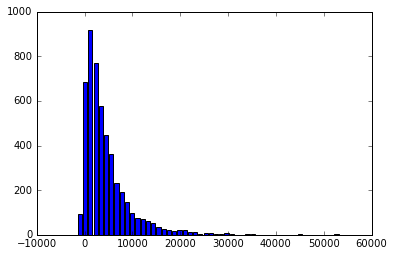

In [110]:
hist, bins = histogram(v30d, bins = 50)
positions = (bins[:-1] + bins[1:]) / 2
width = (bins[1] - bins[0]) * 0.8
plt.bar(positions, hist, width=width)
plt.show()

In [111]:
# Compute number of elements in v30d that are > 0 and < 0 and compare
pos_count = (v30d > 0).sum()
neg_count = (v30d <= 0).sum()

print u"""Strategy 4 was better in %d cases 
Strategy 2 was better in %d cases
Difference = %d""" % (pos_count, neg_count, pos_count - neg_count)

Strategy 4 was better in 4406 cases 
Strategy 2 was better in 594 cases
Difference = 3812
